In [12]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 115.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 15.0 MB/s eta 0:00:00
INFO: pip is looking at mul

In [16]:
!pip install pefile
!pip install mlxtend
!pip install tpot
!pip uninstall scikit-learn -y
!pip install scikit-learn

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [18]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [23]:
!pip install --upgrade scikit-learn lime shap


In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Ransomware.csv",sep='|')

In [5]:
from sklearn.metrics import f1_score
import sklearn.metrics

In [6]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [7]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [8]:
# Checking the size of dataframe
from sys import getsizeof
initial_size = getsizeof(df)/(1024.0**3)
print("Size of DataFrame: {} GB".format(initial_size))

Size of DataFrame: 0.0798260634765029 GB


In [9]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

DISTRIBUTION OF LABELLED DATA

In [10]:
df.legitimate.value_counts() #1 means legitimate, 0 means malware

legitimate
0    96724
1    41323
Name: count, dtype: int64

In [11]:
# Converting labelled data in categories datatype
df.legitimate = df.legitimate.astype('category')
df.legitimate

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: category
Categories (2, int64): [0, 1]

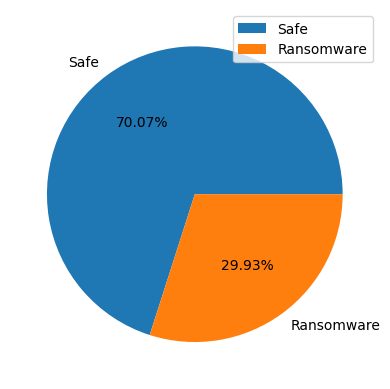

In [12]:
plt.pie(df.legitimate.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.show()

UNIQUE NAMES: Ensuring no duplication as it will lead to biasness while training the model.

In [13]:
df.md5.nunique()

138047

In [15]:
df.md5.shape[0]

138047

**COLUMN ANALYSIS:** detailed analysis of the columns in the DataFrame (df)

In [16]:
df.shape[1] # finding the number of columns in the dataframe

57

In [17]:
df.columns # names of the attributes/columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [18]:
df.dtypes # the data type of each attribut/column

Name                             object
md5                              object
Machine                           int64
SizeOfOptionalHeader              int64
Characteristics                   int64
MajorLinkerVersion                int64
MinorLinkerVersion                int64
SizeOfCode                        int64
SizeOfInitializedData             int64
SizeOfUninitializedData           int64
AddressOfEntryPoint               int64
BaseOfCode                        int64
BaseOfData                        int64
ImageBase                       float64
SectionAlignment                  int64
FileAlignment                     int64
MajorOperatingSystemVersion       int64
MinorOperatingSystemVersion       int64
MajorImageVersion                 int64
MinorImageVersion                 int64
MajorSubsystemVersion             int64
MinorSubsystemVersion             int64
SizeOfImage                       int64
SizeOfHeaders                     int64
CheckSum                          int64


**Exploaratory Data Analysis (EDA):** Correlation matrix of the dataset.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

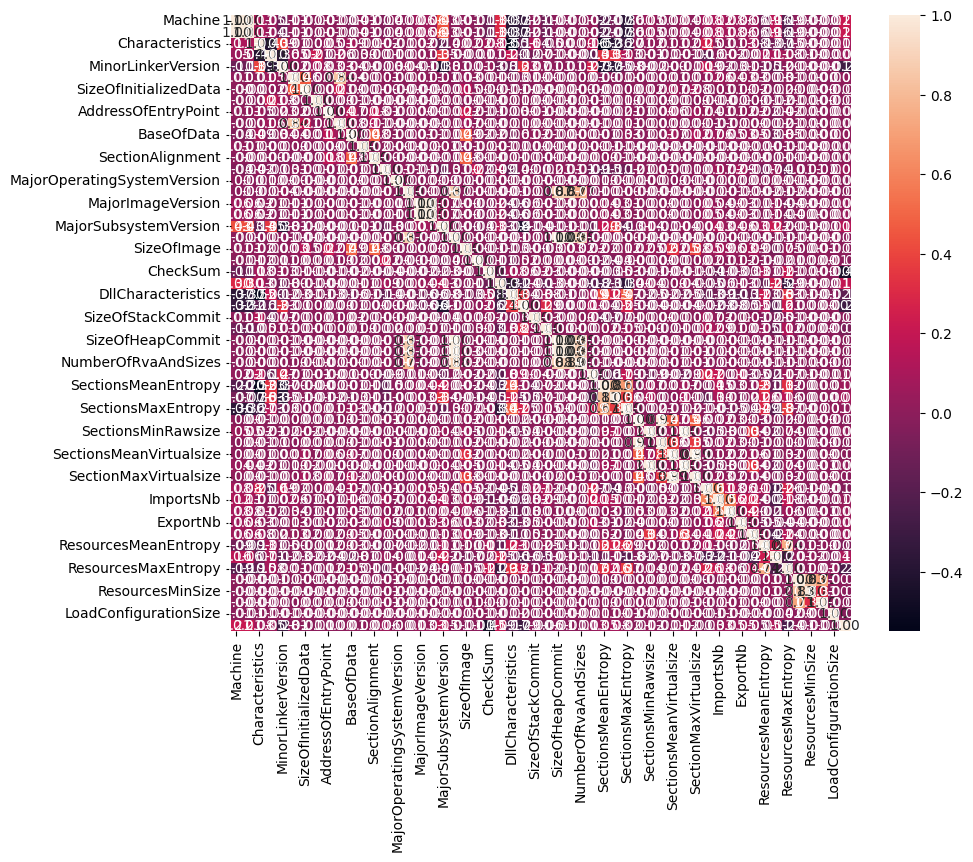

In [24]:
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()


In [25]:
# Using VIF to remove highly correlated columns
# VIF : In regression analysis, a variance inflation factor (VIF)
# is a statistical method that measures the severity of multicollinearity.
# Multicollinearity occurs when two or more independent variables in a model
# are linearly related, which can negatively impact regression results.

from statsmodels.stats.outliers_influence import variance_inflation_factor


cols_vif = df.columns.tolist()
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cols_vif

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[cols_vif].values, i)
                          for i in range(len(cols_vif))]

print(vif_data)

                        feature           VIF
0                       Machine      1.186135
1          SizeOfOptionalHeader      0.021589
2               Characteristics      1.442403
3            MajorLinkerVersion      1.193778
4            MinorLinkerVersion      1.501474
5                    SizeOfCode      5.133843
6         SizeOfInitializedData      1.566649
7       SizeOfUninitializedData      1.000313
8           AddressOfEntryPoint      1.071064
9                    BaseOfCode      4.265322
10                   BaseOfData      1.920030
11                    ImageBase      1.001121
12             SectionAlignment      2.060327
13                FileAlignment      1.078985
14  MajorOperatingSystemVersion      1.000047
15  MinorOperatingSystemVersion      4.159908
16            MajorImageVersion    202.306883
17            MinorImageVersion    185.228229
18        MajorSubsystemVersion      0.637107
19        MinorSubsystemVersion  17289.049499
20                  SizeOfImage   

Interpretation of VIF values:
1. VIF = 1: No correlation with other variables.
2. 1 < VIF < 5: Moderate correlation but generally acceptable.
3. VIF >= 5: Potential multicollinearity problem.
4. VIF > 10: Serious multicollinearity problem.

Deleting the value with VIF > 10.

In [26]:
df.drop(['MinorImageVersion','MinorSubsystemVersion','SizeOfHeapCommit','SectionsMinRawsize','SectionsMinVirtualsize','SectionMaxVirtualsize' ],axis=1, inplace=True)


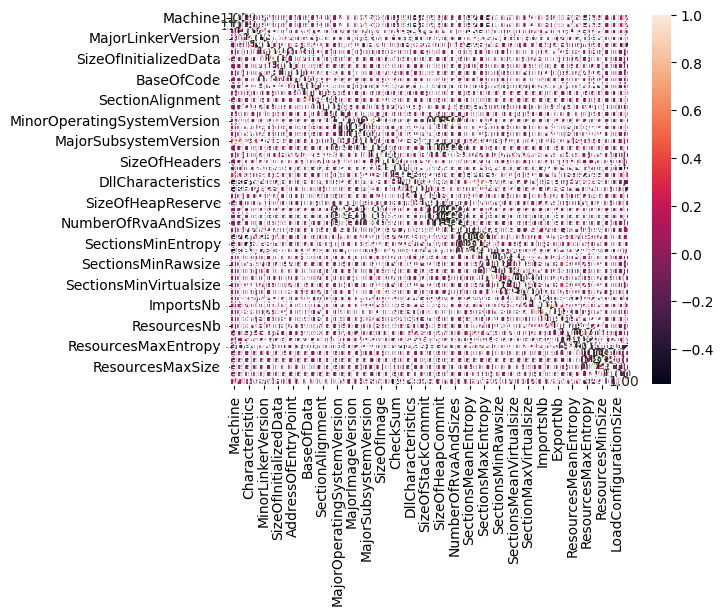

In [28]:
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.show()

**Feature Extraction:** Feature extracting is crucial for our algorithm training. Feature extraction refers to extracting meaning features on which we train our model.

In [7]:
# calculating the Information Value (IV) and Weight of Evidence (WOE)
# for each independent variable in the dataset.


def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [8]:
df=pd.read_csv("Ransomware.csv",sep='|')
df.legitimate = df.legitimate.astype('int64')

In [9]:
iv, woe = iv_woe(df.drop(['Name'],axis=1), 'legitimate')

Information value of md5 is 1.240653
Information value of Machine is 2.596527
Information value of SizeOfOptionalHeader is 2.596853
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MinorImageVersion is 0.17365
Information value of MajorSubsystemVersion is 3.566766
Inf

In [32]:
iv.sort_values(by = 'IV', ascending=False)

,Variable,IV
0,ImageBase,6.097249
0,VersionInformationSize,5.187680
0,SectionsMaxEntropy,4.978054
0,MajorOperatingSystemVersion,4.343420
0,ResourcesMinSize,4.272744
0,SizeOfStackReserve,4.161116
0,Characteristics,3.823743
0,SizeOfInitializedData,3.569039
0,MajorSubsystemVersion,3.566766
0,ResourcesNb,3.088450


from matplotlib import pyplot as plt
_df_0['IV'].plot(kind='hist', bins=20, title='IV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['IV'].plot(kind='line', figsize=(8, 4), title='IV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:15].values.tolist()

In [11]:
features

['ImageBase',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'MajorOperatingSystemVersion',
 'ResourcesMinSize',
 'SizeOfStackReserve',
 'Characteristics',
 'SizeOfInitializedData',
 'MajorSubsystemVersion',
 'SectionsMinVirtualsize',
 'ResourcesNb',
 'Subsystem',
 'ResourcesMinEntropy',
 'BaseOfData',
 'SizeOfImage']

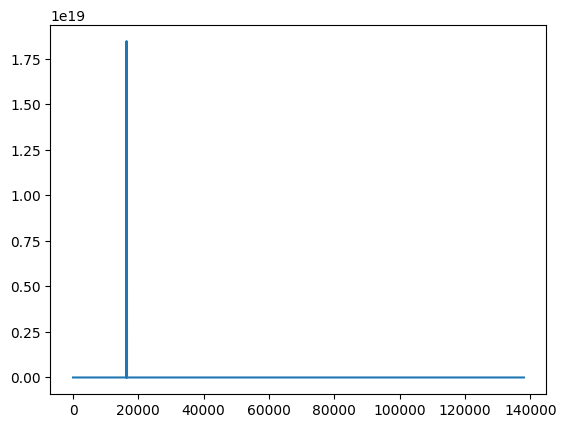

In [12]:
plt.plot(df.ImageBase) #plots the values of the "ImageBase" column from
# the DataFrame "df" against their index values using a line plot.

**Data Imbalance :** To address the data imbalance we are using
SMOTE TOMEK techniques.
SMOTE = Synthetic Minority Over-sampling Technique
TOMEK = Tomek Links

In [13]:
X=df[features]
y=df['legitimate']

In [14]:

randomseed = 42

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [21]:
# POINT A
print(X_test.shape[0] + X_train.shape[0]) # total number of samples in the dataset
print('Training labels shape:', y_train.shape) # Shape of the training labels array.
print('Test labels shape:', y_test.shape) # Shape of the test labels array.
print('Training features shape:', X_train.shape) # Shape of the training features array.
print('Test features shape:', X_test.shape) # Shape of the test features array.

174798
Training labels shape: (129242,)
Test labels shape: (45556,)
Training features shape: (129242, 15)
Test features shape: (45556, 15)


In [17]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [18]:
from collections import Counter
import imblearn

In [19]:
"""
Before SMOTE_Tomek
"""
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)



# creating imblearn resampling object
# sampling strategy is the propotion of output
# resampled data that is the minority class
over_and_under_sample =  imblearn.combine.SMOTETomek(sampling_strategy = 1.0, n_jobs = -1, random_state = randomseed)
X_train, y_train = over_and_under_sample.fit_resample(X_train, y_train)

# checking under- and over-sample ratios between train and test set.
# DO NOT resample the test set!
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Counter({0: 64881, 1: 27610}) Counter({0: 31843, 1: 13713})
Counter({0: 64621, 1: 64621}) Counter({0: 31843, 1: 13713})


**SIGNIFICANT CHANGE IN THE SAMPLES OF MALWARE DATA**

COMPARE POINT A AND POINT B CELLS

In [20]:
#POINT B (POINT A 3 cells above)

print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

174798
Training labels shape: (129242,)
Test labels shape: (45556,)
Training features shape: (129242, 15)
Test features shape: (45556, 15)


**Lazy Predict - AutoML:** LazyPredict is an AutoML (Automated Machine Learning) library in Python that automates the process of building and evaluating machine learning models. It provides a quick and easy way to get an overview of how different models perform on a given dataset without the need for extensive manual configuration.

In [22]:
!pip install scikit-learn==1.0.2 lazypredict==0.2.12


  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tpot 0.12.2 requires scikit-learn>=1.4.1, but you have scikit-learn 1.0.2 which is incompatible.
bigframes 1.6.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [6]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [10]:
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [11]:
df.legitimate = df.legitimate.astype('int64')

In [12]:
iv, woe = iv_woe(df.drop(['Name'],axis=1), 'legitimate')


Information value of md5 is 1.240653
Information value of Machine is 2.596527
Information value of SizeOfOptionalHeader is 2.596853
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MinorImageVersion is 0.17365
Information value of MajorSubsystemVersion is 3.566766
Inf

In [13]:
iv.sort_values(by = 'IV', ascending=False)


,Variable,IV
0,ImageBase,6.10
0,VersionInformationSize,5.19
0,SectionsMaxEntropy,4.98
0,MajorOperatingSystemVersion,4.34
0,ResourcesMinSize,4.27
0,SizeOfStackReserve,4.16
0,Characteristics,3.82
0,SizeOfInitializedData,3.57
0,MajorSubsystemVersion,3.57
0,SectionsMinVirtualsize,3.39


In [14]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:15].values.tolist()


In [15]:
features


['ImageBase',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'MajorOperatingSystemVersion',
 'ResourcesMinSize',
 'SizeOfStackReserve',
 'Characteristics',
 'SizeOfInitializedData',
 'MajorSubsystemVersion',
 'SectionsMinVirtualsize',
 'ResourcesNb',
 'Subsystem',
 'ResourcesMinEntropy',
 'BaseOfData',
 'SizeOfImage']

In [16]:
X=df[features]
y=df['legitimate']

In [16]:
randomseed = 42

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [18]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  3%|▎         | 1/29 [00:06<02:49,  6.04s/it]


KeyboardInterrupt: 

In [19]:
# RandomForestClassifier is best fitting in Auto-ML
randomseed = 42
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = randomseed)

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
pred = rf.predict(X_test)

**CONFUSION MATRIX:** A confusion matrix, also known as an error matrix, is a table that summarizes and visualizes the performance of a classification model in machine learning. It compares the actual values of a dataset to the predicted values, and breaks down the number of correct and incorrect predictions by class.

In [22]:
cm=confusion_matrix(y_test,pred)
cm

array([[31685,   158],
       [  121, 13592]])

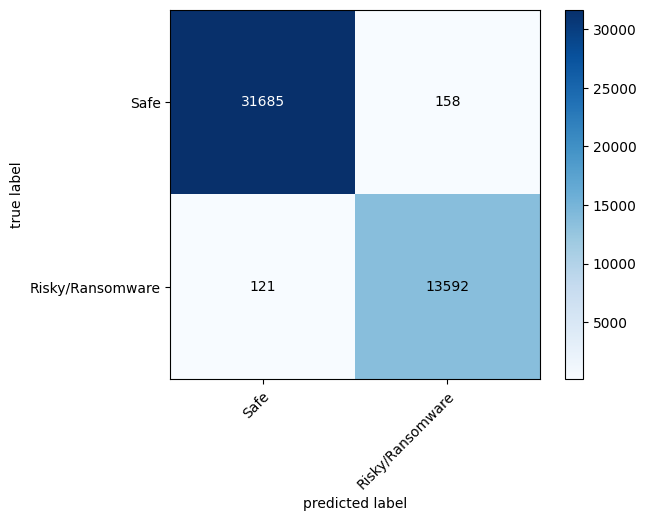

In [23]:
# Classes
classes = ['Safe', 'Risky/Ransomware']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   colorbar = True)

plt.show()

In [24]:
from sklearn.metrics import matthews_corrcoef as mcc
mcc(y_test,pred)

# All the quadrants of CM are having high performance and correlation between correct values

0.9854593055807745

**AUC-ROC: AUC-ROC stands for Area Under the Receiver Operating Characteristic Curve**. It is a performance metric commonly used to evaluate the performance of binary classification models.

In [26]:
from sklearn.metrics import roc_auc_score

auc = np.round(roc_auc_score(y_test, pred), 3)

print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.993


In [27]:
y_pred = rf.predict_proba(X_test)[:,1]
y_pred

array([0.  , 0.  , 0.  , ..., 0.  , 0.27, 0.  ])

In [28]:
!pip install plot-metric

  Using cached plot_metric-0.0.6-py3-none-any.whl (13 kB)


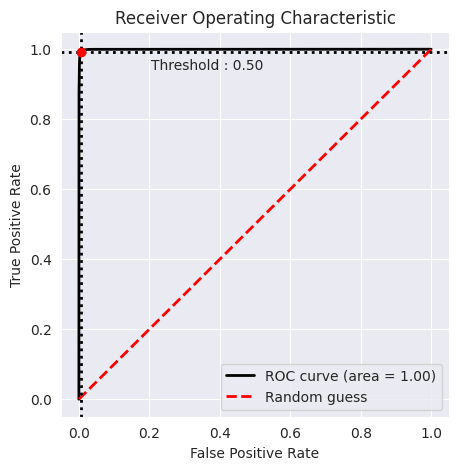

In [29]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Safe", "Ransomware"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

**FEATURE IMPORTANCE:** Feature importance refers to the process of determining the relative significance of input features (independent variables) in predicting the target variable (dependent variable) in a machine learning model. It helps identify which features have the most influence on the model's predictions and can provide valuable insights into the underlying relationships within the data.

In [30]:
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})

In [32]:
!pip install plotly_express --upgrade -q

In [33]:
import plotly_express as px
import plotly.offline as po
px.bar(feat_imp.sort_values(['imps'], ascending=False)[:25], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})